# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;"> Employee-Worker </p>
​
<img src="https://uschamber-co.imgix.net/https%3A%2F%2Fs3.us-east-1.amazonaws.com%2Fco-assets%2Fassets%2Fimages%2FTemporary-Worker-Contractor-Difference.jpg?auto=compress%2Cformat&crop=focalpoint&fit=crop&fp-x=0.3289&fp-y=0.4046&h=415&q=88&w=622&s=72c84d21396ffa909c11e5aac3d6cd31">
​
​
<!-- <img src="https://cdn.dribbble.com/users/223902/screenshots/1772418/dribbble.jpg?compress=1&resize=800x600&vertical=top">
​
<img src="https://cdn.dribbble.com/users/1209618/screenshots/3000481/media/2c83cb04193be0215eb94f62429b1a70.gif"> -->
​
<b> Context </b>
​
Dataset contains following features:
​

**DATA DESCRIPTION**

1. `satisfaction_level`: A numerical value representing the satisfaction level of the employee. It seems to range between 0 and 1, with 1 indicating high satisfaction.

2. `last_evaluation`: A numerical value representing the last evaluation score of the employee. This score might be related to their performance evaluation.

3. `number_project`: An integer representing the number of projects the employee is or was involved in.

4. `average_montly_hours`: An integer representing the average number of monthly working hours for the employee.

5. `time_spend_company`: An integer representing the number of years the employee has spent at the company.

6. `Work_accident`: A binary value (0 or 1) indicating whether the employee has had a work accident or not.

7. `left`: A binary value (0 or 1) indicating whether the employee has left the company (1) or is still employed (0).

8. `promotion_last_5years`: A binary value (0 or 1) indicating whether the employee has received a promotion in the last 5 years.

9. `sales`: This seems to represent the department or sales division in which the employee works.

10. `salary`: This seems to represent the salary level of the employee, categorized as "low," "medium," or possibly other levels.



<a id="1"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">📚 IMPORTING LIBRARIES</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import datetime
import folium
from folium.plugins import HeatMap
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import tabulate
# import graphviz



import scipy.stats as stats
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import xgboost as xgb

from sklearn.pipeline import Pipeline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set style of seaborn plots
sns.set_style('darkgrid')

# Palette
palette = sns.color_palette('plasma')

<a id="2"></a>

<p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;">📖 LOADING DATA</p>

In [3]:
workers= pd.read_csv('/kaggle/input/employee-worker/HR.csv')
workers.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<a id="3"></a>

<p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;"> Data Overview</p>

In [4]:
workers.T

,0,1,2,3,4,5,6,7,8,9,...,14989,14990,14991,14992,14993,14994,14995,14996,14997,14998
satisfaction_level,0.38,0.8,0.11,0.72,0.37,0.41,0.1,0.92,0.89,0.42,...,0.43,0.89,0.09,0.4,0.76,0.4,0.37,0.37,0.11,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52,0.5,0.77,0.85,1.0,0.53,...,0.57,0.88,0.81,0.48,0.83,0.57,0.48,0.53,0.96,0.52
number_project,2,5,7,5,2,2,6,5,5,2,...,2,5,6,2,6,2,2,2,6,2
average_montly_hours,157,262,272,223,159,153,247,259,224,142,...,159,228,257,155,293,151,160,143,280,158
time_spend_company,3,6,4,5,3,3,4,5,5,3,...,3,5,4,3,6,3,3,3,4,3
Work_accident,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
left,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
promotion_last_5years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sales,sales,sales,sales,sales,sales,sales,sales,sales,sales,sales,...,technical,support,support,support,support,support,support,support,support,support
salary,low,medium,medium,low,low,low,low,low,low,low,...,low,low,low,low,low,low,low,low,low,low


In [5]:
workers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
workers.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [7]:
workers.shape

(14999, 10)

In [8]:
workers.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [9]:
workers.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [10]:
def find_cols_with_nulls(workers):
    cols_with_null = []
    for col in workers.columns:
        if workers[col].isnull().any() | workers[col].isna().any():
            cols_with_null.append(col)
    return cols_with_null

In [11]:
miss_cols = find_cols_with_nulls(workers)
if miss_cols == []:
    print('----- There is no missing values. -----')
else:    
    print(f'Columns that have NULL data are:')
    for col in miss_cols:
        print(f'{col:8}: {workers[col].isnull().sum():6} missing values')

----- There is no missing values. -----


<div class="alert alert-block alert-info ;"> 📌  We do not have any null or missing data  </div>

In [12]:
workers.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0



<a id="4"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;">📊 EDA</p>
​

<Axes: ylabel='left'>

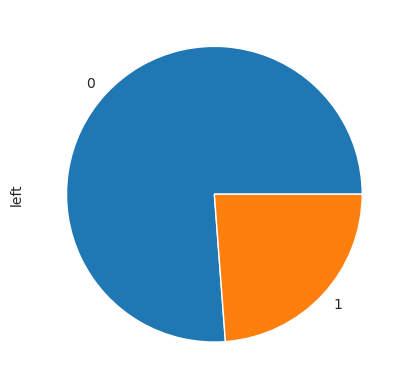

In [13]:
workers['left'].value_counts().plot(kind='pie')

<Axes: xlabel='left', ylabel='count'>

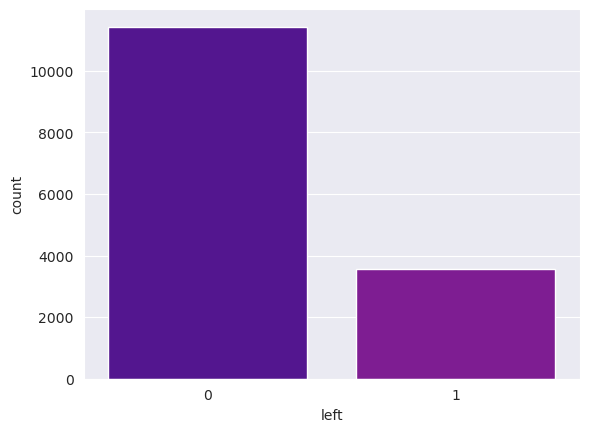

In [14]:
sns.countplot(data = workers , x='left' , palette=palette)

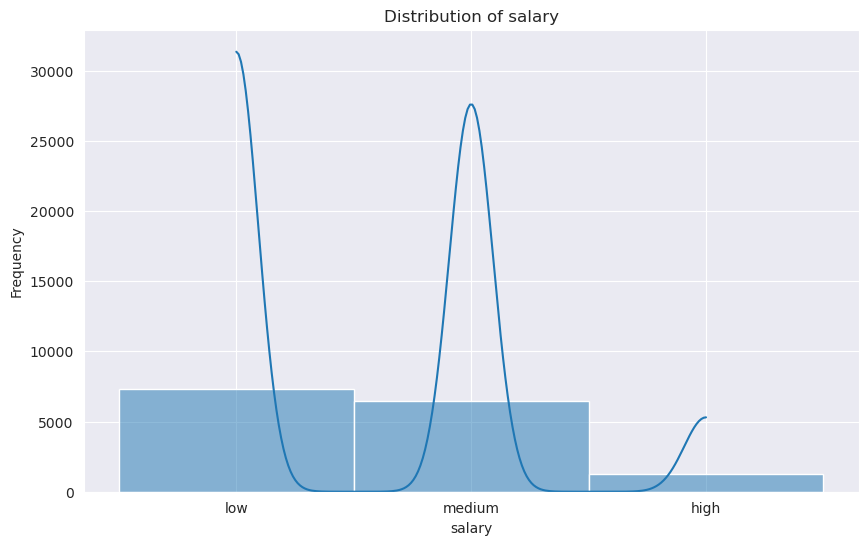

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(workers['salary'], bins=200, kde=True)
plt.title('Distribution of salary')
plt.xlabel('salary')
plt.ylabel('Frequency')
plt.show()

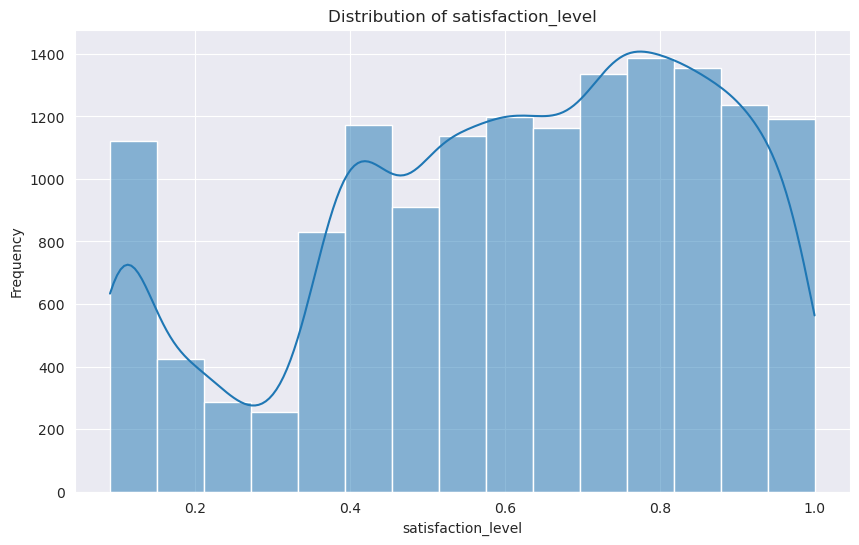

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(workers['satisfaction_level'], bins=15, kde=True)
plt.title('Distribution of satisfaction_level')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.show()

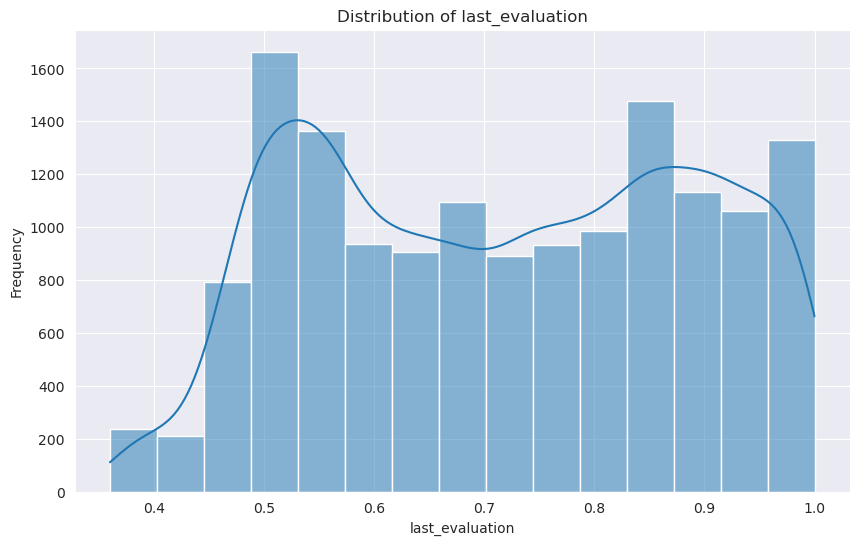

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(workers['last_evaluation'], bins=15, kde=True)
plt.title('Distribution of last_evaluation')
plt.xlabel('last_evaluation')
plt.ylabel('Frequency')
plt.show()

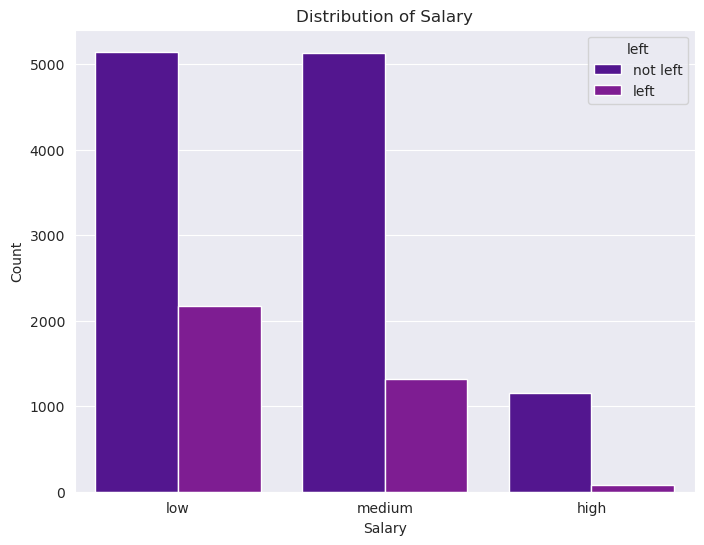

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=workers, x='salary', hue='left' , palette=palette)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend(title='left', labels=['not left', 'left'])
plt.show()

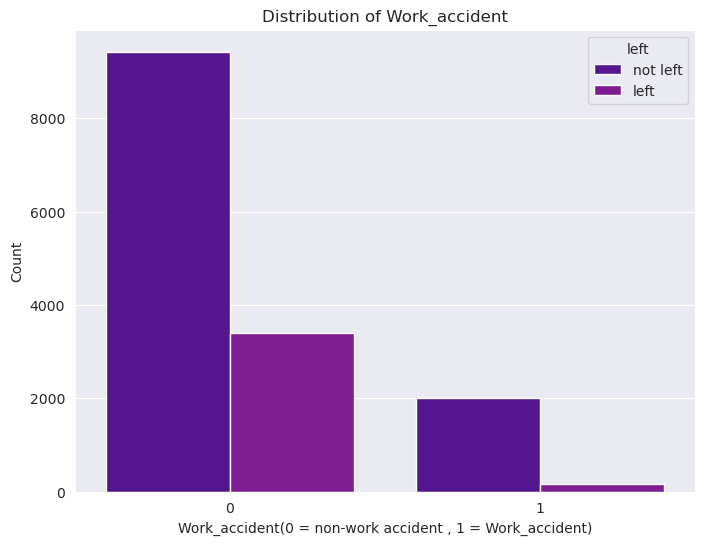

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=workers, x='Work_accident', hue='left' , palette=palette)
plt.title('Distribution of Work_accident')
plt.xlabel('Work_accident(0 = non-work accident , 1 = Work_accident)')
plt.ylabel('Count')
plt.legend(title='left', labels=['not left', 'left'])
plt.show()

In [20]:
workers.corr()["left"].sort_values(ascending=False)


left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

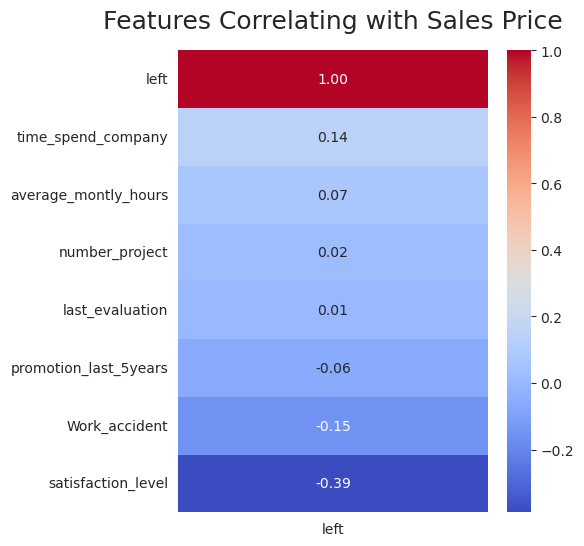

In [21]:
plt.figure(figsize=(5, 6))
heatmap = sns.heatmap(workers.corr()[["left"]].sort_values(by="left", ascending=False),
                      annot=True, cmap='coolwarm', fmt=".2f"
)
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

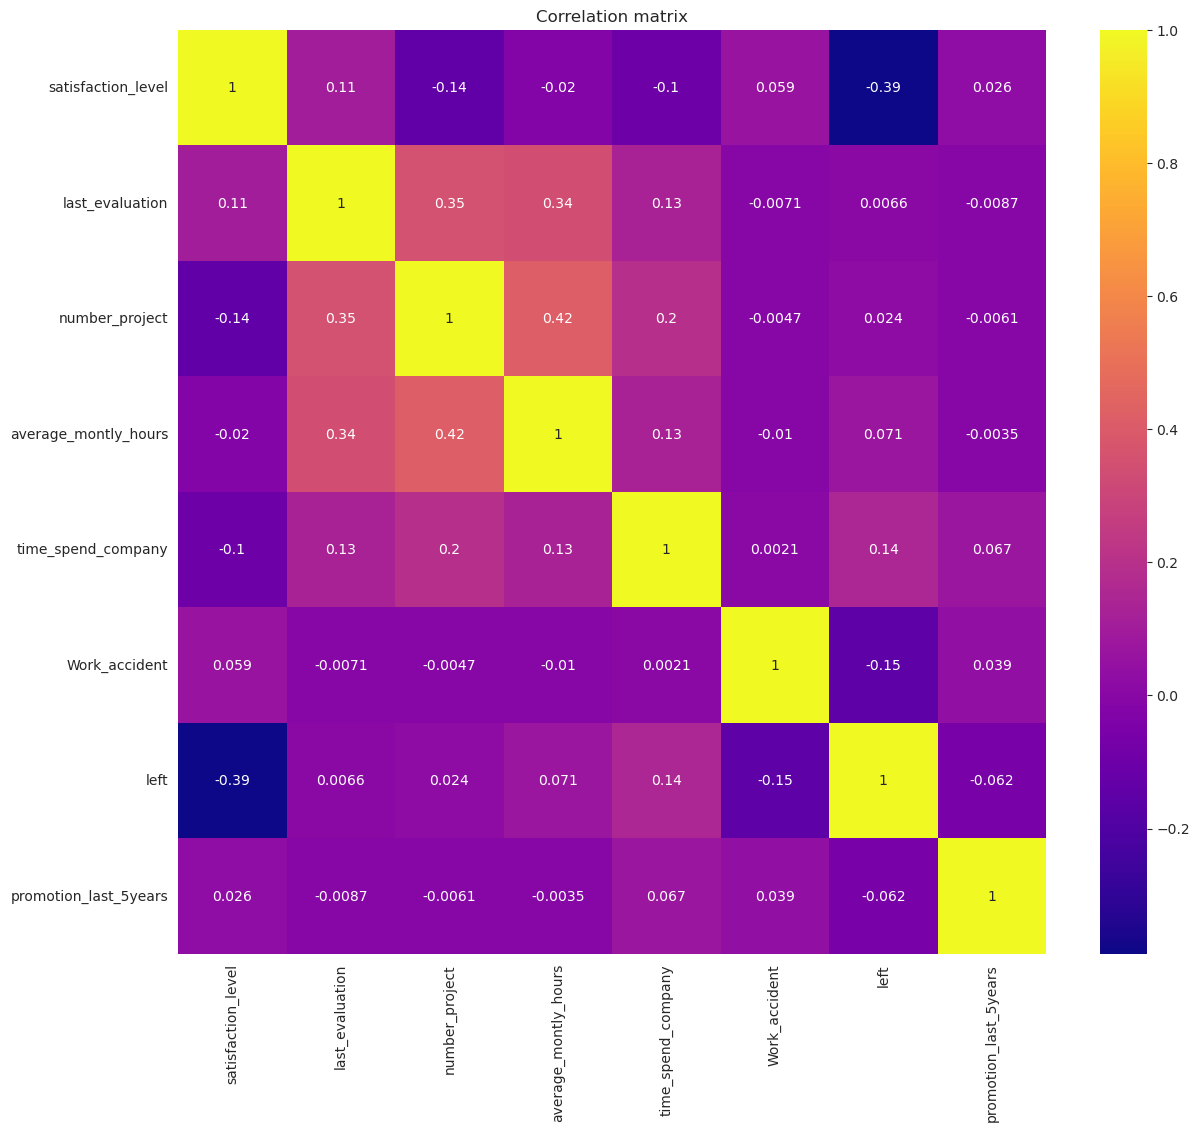

In [22]:
corr_matrix=workers.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title(f'Correlation matrix')
plt.show()

In [23]:
from scipy.stats import shapiro
shapiro(workers['left'])

ShapiroResult(statistic=0.5280793309211731, pvalue=0.0)

<a id="4"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;">Preprocessing </p>

# Outliers

In [24]:
numerical_features =['satisfaction_level',
'last_evaluation',
'number_project',
'average_montly_hours',
'time_spend_company',
'Work_accident',
'promotion_last_5years']

Q1 = workers[numerical_features].quantile(0.25)
Q3 = workers[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((workers[numerical_features] < (Q1 - 1.5 * IQR)) | (workers[numerical_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

satisfaction_level          0
last_evaluation             0
number_project              0
average_montly_hours        0
time_spend_company       1282
Work_accident            2169
promotion_last_5years     319
dtype: int64

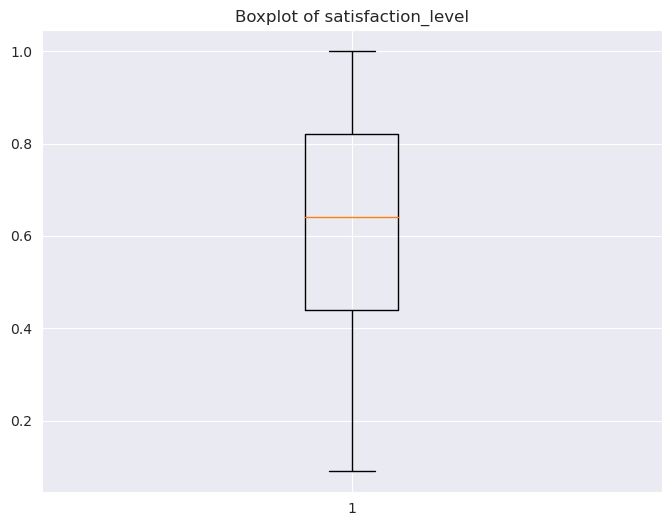

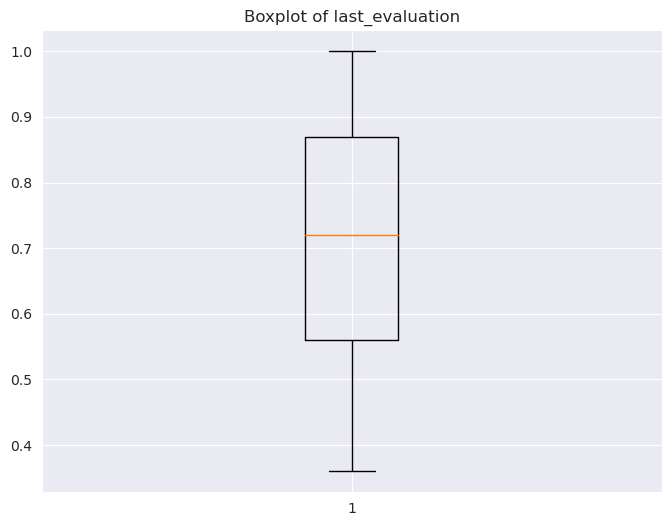

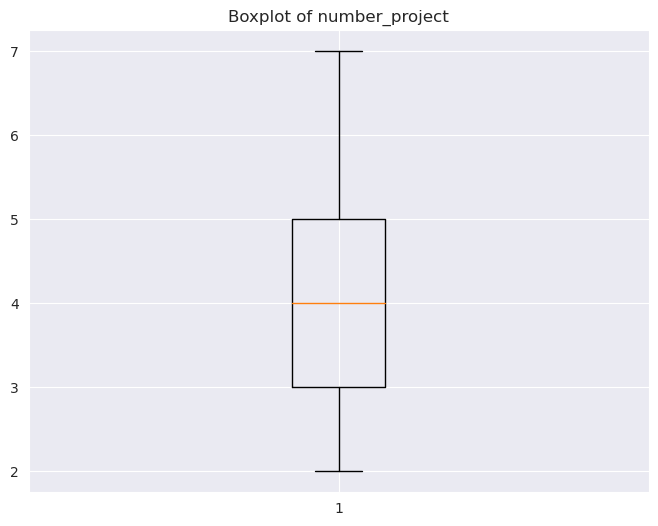

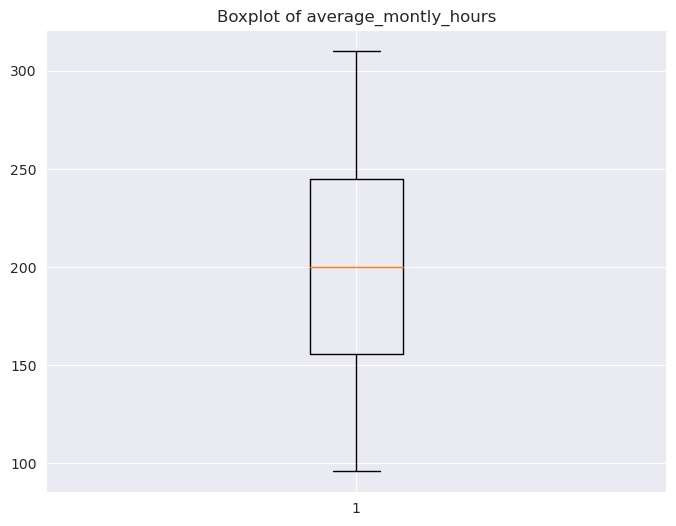

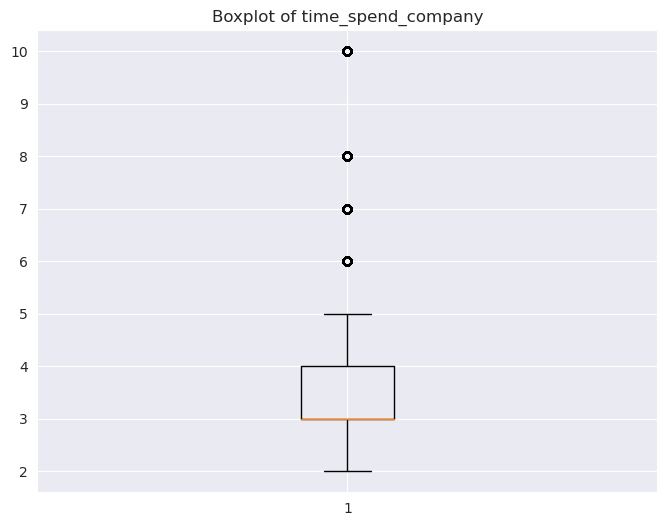

In [25]:

numerical_features =['satisfaction_level',
'last_evaluation',
'number_project',
'average_montly_hours',
'time_spend_company']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(workers[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


<a id="6"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:170%;text-align:center;border-radius:10px 10px;">✂️ SPLITING DATA</p>

In [26]:
X=workers.drop("left", axis=1)
y = workers['left']

In [27]:
print(f'Shape of features: {X.shape} with type: {type(X)}')
print(f'Shape of taget   : {y.shape}    with type: {type(y)}')

Shape of features: (14999, 9) with type: <class 'pandas.core.frame.DataFrame'>
Shape of taget   : (14999,)    with type: <class 'pandas.core.series.Series'>


<h3 style="background-color:#FF69B4;">
<!-- <div style="direction:rtl">  </div> -->
Convert reservation_status_date to separated columns
</h3>

In [28]:
workers.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [29]:
categorical_features = X.columns[X.dtypes == 'object']
numerical_features = X.columns[X.dtypes != 'object']
print(categorical_features.size, categorical_features)
print(numerical_features.size, numerical_features)

2 Index(['sales', 'salary'], dtype='object')
7 Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object')


<h2 style="background-color:#FF69B4;">
<!-- <div style="direction:rtl">  </div> -->
Convert Categorical columns (OHE)
</h2>

In [30]:
print(categorical_features)
X[categorical_features]
print(X[categorical_features].nunique())

Index(['sales', 'salary'], dtype='object')
sales     10
salary     3
dtype: int64


In [31]:
new_cols_num = X[categorical_features].nunique().sum()
print(f'OHE add ({new_cols_num} - {categorical_features.size} = {new_cols_num - categorical_features.size}) new columns:')
print(f'Shape BEFORE OHE:  {X.shape}')
col_trans = ColumnTransformer(
    [(col, OneHotEncoder(), [np.argmax(X.columns == col)]) for col in categorical_features],
    remainder='passthrough', sparse_threshold= 0.1)
X = col_trans.fit_transform(X)

print(f'Shape AFTER  OHE:  {X.shape}')
print(f'New type for feature vars. : {type(X)}\n')

OHE add (13 - 2 = 11) new columns:
Shape BEFORE OHE:  (14999, 9)
Shape AFTER  OHE:  (14999, 20)
New type for feature vars. : <class 'numpy.ndarray'>



In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split (X , y , test_size=0.3 , random_state=101)

<a id="7"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:10px 10px;">📐 Scaling</p>


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

In [36]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

<a id="8"></a>
# <p style="background-color:#FF69B4;font-family:newtimeroman;color:#black;font-size:150%;text-align:center;border-radius:10px 10px;">💡 MODELS</p>

# 1️⃣ DecisionTree 🌲

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [38]:
dt_model= DecisionTreeRegressor()

In [39]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
dt_model.score(X_train,y_train)

1.0

In [41]:
dt_model.score(X_test,y_test)

0.8883508341242384

## 🔎  Predict Dt

In [42]:
y_pred_dt=dt_model.predict(X_test)

## Evaluate the model using mean squared error (MSE)

In [43]:
mse=mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.02022222222222222


In [44]:
from sklearn import metrics

In [45]:
r2=metrics.r2_score(y_test, y_pred_dt)
print(f"r2_score: {r2}")


r2_score: 0.8883508341242384


## Grid Search Dt

In [46]:
# Create a Decision Tree Regressor
model = DecisionTreeRegressor()

# Define a parameter grid to search over
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object with the model and parameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error: {mse}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Mean Squared Error: 0.017441021418560586


## 2️⃣.SVM 

In [47]:
from sklearn.svm import SVR
s=SVR()
s.fit(X_train,y_train)
y_pred_dt=s.predict(X_test)

In [48]:
metrics.mean_absolute_error(y_test,y_pred_dt)

0.12810171224092431

In [49]:
r2=metrics.r2_score(y_test, y_pred_dt)
print(f"r2_score: {r2}")


r2_score: 0.7410127355069809


## 3.xgboost
